# Подключение библиотек

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron


from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

# Загрузка и подготовка датасета

In [ ]:
url = "https://raw.githubusercontent.com/nazgull08/ibm7/master/titanic.csv"
dataset = read_csv(url)

dataset = dataset.iloc[0:,[2,4,5,1]]

dataset.loc[dataset["Sex"] == "male", "Sex"] = 0
dataset.loc[dataset["Sex"] == "female", "Sex"] = 1
dataset = dataset.dropna()
dataset

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0
...,...,...,...,...
885,3,1,39.0,0
886,2,0,27.0,0
887,1,1,19.0,1
889,1,0,26.0,1


# Анализ датасета

In [ ]:
#print(dataset.shape)

print(dataset.describe())

#print(dataset.groupby('class').size())



           Pclass         Age    Survived
count  714.000000  714.000000  714.000000
mean     2.236695   29.699118    0.406162
std      0.838250   14.526497    0.491460
min      1.000000    0.420000    0.000000
25%      1.000000   20.125000    0.000000
50%      2.000000   28.000000    0.000000
75%      3.000000   38.000000    1.000000
max      3.000000   80.000000    1.000000


# Визуализация

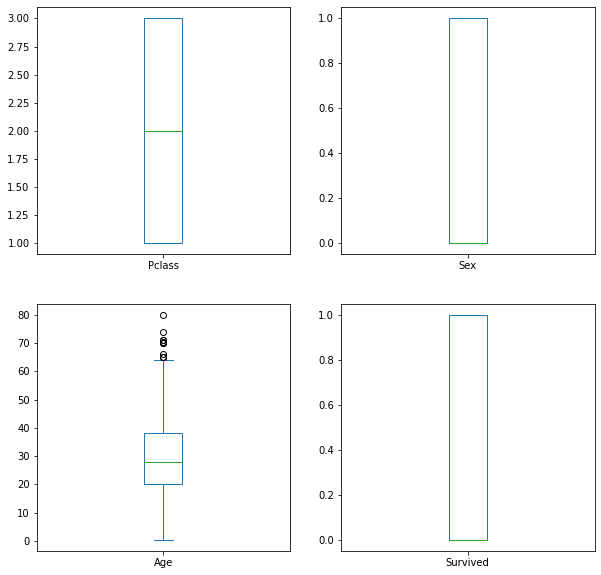

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Гистограмма

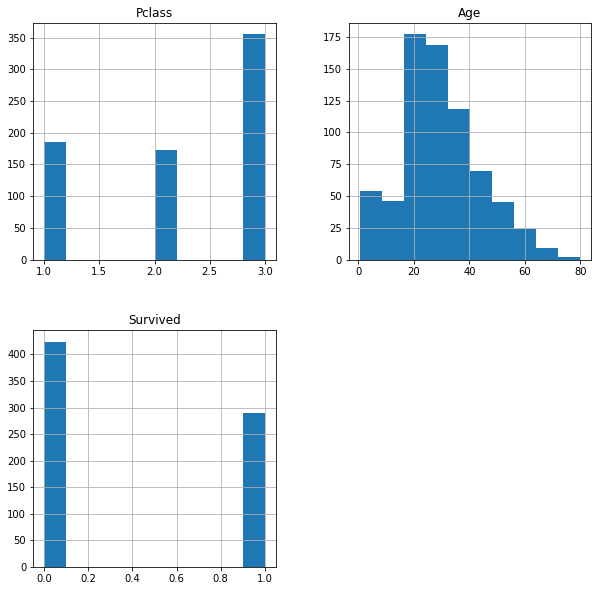

In [ ]:
dataset.hist()
pyplot.show()

# Рассеяние

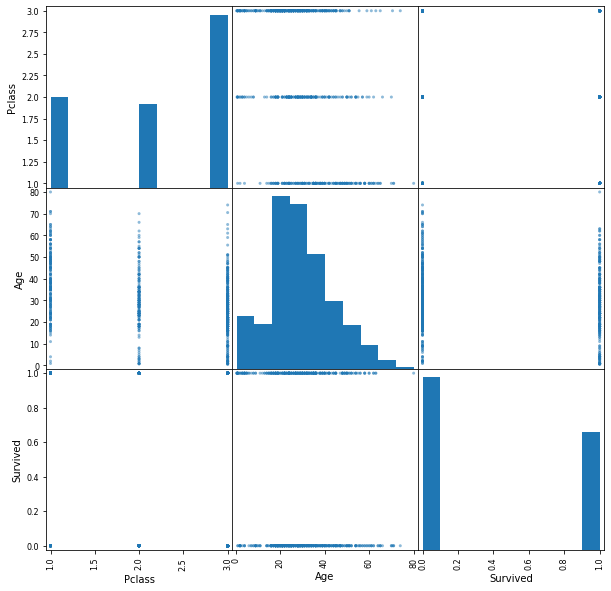

In [ ]:
scatter_matrix(dataset)
pyplot.show()

# Создание выборки

In [ ]:

ds = dataset.iloc[:600]
ds_test = dataset.iloc[600:]
X_train = ds.drop("Survived", axis=1)
X_test = ds_test.drop("Survived", axis=1)
Y_train = ds["Survived"]
X_test

,Pclass,Sex,Age
753,3,0,23.00
754,2,1,48.00
755,2,0,0.67
756,3,0,28.00
757,2,0,18.00
...,...,...,...
885,3,1,39.00
886,2,0,27.00
887,1,1,19.00
889,1,0,26.00


# Использование моделей

# Логистическая регрессия

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
ds_test['predicted'] = Y_pred.tolist()
ds_test.loc[ds_test["Survived"] == ds_test["predicted"], "Nice"] = 1
ds_test.loc[ds_test["Survived"] != ds_test["predicted"], "Nice"] = 0
a = ds_test["Nice"].sum()
b = ds_test["Nice"].size
print(a)
print(b)
print(a/b)

91.0
114
0.7982456140350878


# Дерево решений

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
ds_test['predicted'] = Y_pred.tolist()
ds_test.loc[ds_test["Survived"] == ds_test["predicted"], "Nice"] = 1
ds_test.loc[ds_test["Survived"] != ds_test["predicted"], "Nice"] = 0
a = ds_test["Nice"].sum()
b = ds_test["Nice"].size
print(a)
print(b)
print(a/b)

94.0
114
0.8245614035087719


# Машина опорных векторов

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
ds_test['predicted'] = Y_pred.tolist()
ds_test.loc[ds_test["Survived"] == ds_test["predicted"], "Nice"] = 1
ds_test.loc[ds_test["Survived"] != ds_test["predicted"], "Nice"] = 0
a = ds_test["Nice"].sum()
b = ds_test["Nice"].size
print(a)
print(b)
print(a/b)

72.0
114
0.631578947368421


# Персептрон

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
ds_test['predicted'] = Y_pred.tolist()
ds_test.loc[ds_test["Survived"] == ds_test["predicted"], "Nice"] = 1
ds_test.loc[ds_test["Survived"] != ds_test["predicted"], "Nice"] = 0
a = ds_test["Nice"].sum()
b = ds_test["Nice"].size
print(a)
print(b)
print(a/b)

60.0
114
0.5263157894736842


# Факторный анализ

In [ ]:
coeff_df = pd.DataFrame(ds.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.358793
2,Age,-0.032221
0,Pclass,-1.217336
3,Survived,NaN
